In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')

In [15]:
shapes_arr = ["circle-750.0", "triangle-900.0", "triangle_inverted-1220.0", "diamond-600.0", "diamond-915.0", "square-600.0", "rect-458.0-610.0", "rect-762.0-915.0", "rect-915.0-1220.0", "pentagon-915.0", "octagon-915.0"]

CONFIDENCE_LEVEL = 0.403


In [16]:
MAPILLARY_LABEL_COUNTS_DICT = {
    "circle-750.0": 18144,
    "triangle-900.0": 1473,
    "triangle_inverted-1220.0": 1961,
    "diamond-600.0": 1107,
    "diamond-915.0": 3539,
    "square-600.0": 1898,
    "rect-458.0-610.0": 1580,
    "rect-762.0-915.0": 839,
    "rect-915.0-1220.0": 638,
    "pentagon-915.0": 204,
    "octagon-915.0": 1001,
    "other-0.0-0.0": 60104,
}
MAPILLARY_TOTAL_LABEL_COUNTS = sum(MAPILLARY_LABEL_COUNTS_DICT.values())
MAPILLARY_NON_OTHER_LABEL_COUNTS = MAPILLARY_TOTAL_LABEL_COUNTS - MAPILLARY_LABEL_COUNTS_DICT["other-0.0-0.0"]
MAPILLARY_NON_OTHER_LABEL_COUNTS

32384

In [17]:
MASK_NAMES_ARR = ['10x10', '10x20', '2_10x20']

### MTSD

In [5]:
mtsd_results = pd.read_csv('../runs/paper_results_new/mtsd/results.csv')

no_attack_results = pd.DataFrame()
no_attack_results['class'] = shapes_arr
fnr_per_shape = []
ap_50_95_per_shape = []
for shape in shapes_arr:
    fnr_per_shape.append(mtsd_results[f'fnr_{shape}'].values[0])
    ap_50_95_per_shape.append(mtsd_results[f'ap_50_95_{shape}'].values[0])
no_attack_results['fnr'] = fnr_per_shape
no_attack_results['ap_50_95'] = ap_50_95_per_shape
no_attack_results


,class,fnr,ap_50_95
0,circle-750.0,0.148343,0.714962
1,triangle-900.0,0.116737,0.750458
2,triangle_inverted-1220.0,0.144152,0.658738
3,diamond-600.0,0.210227,0.645203
4,diamond-915.0,0.107199,0.786711
5,square-600.0,0.060176,0.747581
6,rect-458.0-610.0,0.214966,0.598678
7,rect-762.0-915.0,0.273504,0.649011
8,rect-915.0-1220.0,0.304302,0.632533
9,pentagon-915.0,0.218560,0.676381


## Real/Real Ablation

In [6]:
benchmark_results = pd.read_csv(f'../runs/paper_results/real_baseline/results.csv')

no_attack_results = pd.DataFrame()
no_attack_results['class'] = shapes_arr
fnr_per_shape = []
ap_50_95_per_shape = []
for shape in shapes_arr:
    fnr_per_shape.append(benchmark_results[f'fnr_{shape}'].values[0])
    ap_50_95_per_shape.append(benchmark_results[f'ap_50_95_{shape}'].values[0])
no_attack_results['fnr'] = fnr_per_shape
no_attack_results['ap_50_95'] = ap_50_95_per_shape
no_attack_results

,class,fnr,ap_50_95
0,circle-750.0,0.153398,0.680513
1,triangle-900.0,0.092063,0.690202
2,triangle_inverted-1220.0,0.082625,0.776902
3,diamond-600.0,0.037975,0.759063
4,diamond-915.0,0.107542,0.748696
5,square-600.0,0.083022,0.766459
6,rect-458.0-610.0,0.390756,0.525101
7,rect-762.0-915.0,0.177778,0.675128
8,rect-915.0-1220.0,0.340720,0.554890
9,pentagon-915.0,0.052632,0.664967


In [7]:
# translate+scale + relighting

lmbd = '0.00001'
patch_dim = 64
mask_name = '10x10'

results_df_path = f'../runs/paper_results_new/real_attack_real_gen_translate_scale_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'
results_df = pd.read_csv(results_df_path)

attack_results = pd.DataFrame()
attack_results['class'] = shapes_arr
fnr_per_shape = []
for index, shape in enumerate(shapes_arr):
    fnr_per_shape.append(results_df[f'fnr_{shape}'].values[index])
attack_results['fnr'] = fnr_per_shape
attack_results



,class,fnr
0,circle-750.0,0.291102
1,triangle-900.0,0.499133
2,triangle_inverted-1220.0,0.087696
3,diamond-600.0,0.505703
4,diamond-915.0,0.167131
5,square-600.0,0.617854
6,rect-458.0-610.0,0.934985
7,rect-762.0-915.0,0.687214
8,rect-915.0-1220.0,0.490260
9,pentagon-915.0,0.820513


In [8]:
# lmbd = '0.00001'
# patch_dim = 32

mask_name = '10x10'
# mask_name = '10x20'
# mask_name = '2_10x20'


real_success_rates_dataframe = pd.DataFrame()
# for lmbd in ['0.1']:
#     for patch_dim in [128]:
for lmbd in ['0.00001']:
    for patch_dim in [64]:
        for class_label, shape in enumerate(shapes_arr):
            # if class_label != 8:
            #     continue
            # base_results_per_label_df = pd.read_csv(f'../runs/paper_results/real_baseline/real-10x20_bottom_mapillary_none_{class_label}/results_per_label.csv')
            base_results_per_label_df = pd.read_csv(f'../runs/paper_results/real_baseline/real-10x20_bottom_mapillary_none_0/results_per_label.csv')
            
            base_results_per_label_df = base_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou']]
            # select only signs with label 'class_label'
            base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == class_label]
            # remove synthetic signs
            base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['object_id'] != -1]
            # select signs that were predicted correctly
            # base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == base_results_per_label_df['prediction']]
            
            num_positive_class_clean = len(base_results_per_label_df)
            # print('num_positive_class_clean', num_positive_class_clean)
            base_results_per_label_df = base_results_per_label_df[
                                    (base_results_per_label_df['label'] == base_results_per_label_df['prediction']) &
                                    (base_results_per_label_df['confidence'] >=  CONFIDENCE_LEVEL) &
                                    (base_results_per_label_df['iou'] >= 0.5)
                                    ]
            clean_tpr = len(base_results_per_label_df)/num_positive_class_clean
            # print(1-clean_tpr)
            # print('patch_dim', patch_dim, '|', shape, '|',  'clean_tpr', clean_tpr)
            # ap = np.load(f'../runs/paper_results/synthetic_baseline/synthetic-10x20_bottom_mapillary_none_{class_label}/ap.npy')
            

            # attack_results_per_label_df_path = f'../runs/paper_results/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}/synthetic-10x20_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/synthetic-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_real_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/real-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'
            attack_results_per_label_df_path = f'../runs/paper_results_new/real_attack_real_gen_translate_scale_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/real-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'

            # results_df_path = f'../runs/paper_results/real_attack_real_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'

            # results_df_path = f'../runs/paper_results/real_attack_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_syn_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/synthetic-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_syn_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'

            attack_results_per_label_df = pd.read_csv(attack_results_per_label_df_path)
            
            # calculate average sign size
            attack_results_per_label_df['avg_sign_size'] = (attack_results_per_label_df['sign_width'] + attack_results_per_label_df['sign_height']) / 2
            
            attack_results_per_label_df = attack_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou', 'avg_sign_size']]
            # remove synthetic signs
            attack_results_per_label_df = attack_results_per_label_df[attack_results_per_label_df['object_id'] != -1]
            
            
            results_per_label_merged_df = base_results_per_label_df.merge(attack_results_per_label_df, on=['filename', 'object_id', 'label'], suffixes=['_base', '_attack'], how='left')

            num_correct_clean = len(results_per_label_merged_df)
            # not_correct_adversarial_df = results_per_label_merged_df[(results_per_label_merged_df['label'] != results_per_label_merged_df['prediction_attack']) | 
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['confidence_attack'] < 0.403) & (results_per_label_merged_df['iou_attack'] > 0.5)) |
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['iou_attack'] < 0.5))]
            
            correct_adversarial_df = results_per_label_merged_df[
                                (results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) &
                                (results_per_label_merged_df['confidence_attack'] >=  CONFIDENCE_LEVEL) &
                                (results_per_label_merged_df['iou_attack'] >= 0.5)
                                ]

            # correct_adversarial_df = results_per_label_merged_df[(results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) | 
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['confidence_attack'] < 0.403) & (results_per_label_merged_df['iou_attack'] > 0.5)) |
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['iou_attack'] < 0.5))]
            
            num_correct_adversarial = len(correct_adversarial_df)
            attack_success_rate = (num_correct_clean-num_correct_adversarial)/num_correct_clean
            print(attack_success_rate)

            row = {'class_label': class_label, 'shape': shape, 'lambda': lmbd, 'patch_dim': patch_dim, 'asr': attack_success_rate}
            real_success_rates_dataframe = real_success_rates_dataframe.append(row, ignore_index = True)
            
            


0.16579458812976527
0.4982517482517482
0.08079470198675497
0.5723684210526315
0.11424100156494522
0.6134282807731435
0.9057471264367816
0.6621621621621622
0.39915966386554624
0.8888888888888888
0.15980230642504117


In [9]:
# 3D transform + no relighting

lmbd = '0.00001'
patch_dim = 64
mask_name = '10x10'

results_df_path = f'../runs/paper_results_new/real_attack_real_gen_relighting_0_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'
results_df = pd.read_csv(results_df_path)

# fnr_columns = [x for x in list(results_df.columns) if 'fnr' in x]
# results_df[['name'] + fnr_columns]

attack_results = pd.DataFrame()
attack_results['class'] = shapes_arr
fnr_per_shape = []
for index, shape in enumerate(shapes_arr):
    fnr_per_shape.append(results_df[f'fnr_{shape}'].values[index])
attack_results['fnr'] = fnr_per_shape
attack_results





,class,fnr
0,circle-750.0,0.375902
1,triangle-900.0,0.601386
2,triangle_inverted-1220.0,0.090504
3,diamond-600.0,0.653439
4,diamond-915.0,0.198011
5,square-600.0,0.632509
6,rect-458.0-610.0,0.950464
7,rect-762.0-915.0,0.741537
8,rect-915.0-1220.0,0.623377
9,pentagon-915.0,0.782051


In [10]:
# lmbd = '0.00001'
# patch_dim = 32

# mask_name = '10x10'
# mask_name = '10x20'
mask_name = '2_10x20'


real_success_rates_dataframe = pd.DataFrame()
# for lmbd in ['0.1']:
#     for patch_dim in [128]:
for lmbd in ['0.00001']:
    for patch_dim in [64]:
        for class_label, shape in enumerate(shapes_arr):
            # if class_label != 8:
            #     continue
            # base_results_per_label_df = pd.read_csv(f'../runs/paper_results/real_baseline/real-10x20_bottom_mapillary_none_{class_label}/results_per_label.csv')
            base_results_per_label_df = pd.read_csv(f'../runs/paper_results/real_baseline/real-10x20_bottom_mapillary_none_0/results_per_label.csv')
            
            base_results_per_label_df = base_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou']]
            # select only signs with label 'class_label'
            base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == class_label]
            # remove synthetic signs
            base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['object_id'] != -1]
            # select signs that were predicted correctly
            # base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == base_results_per_label_df['prediction']]
            
            num_positive_class_clean = len(base_results_per_label_df)
            # print('num_positive_class_clean', num_positive_class_clean)
            base_results_per_label_df = base_results_per_label_df[
                                    (base_results_per_label_df['label'] == base_results_per_label_df['prediction']) &
                                    (base_results_per_label_df['confidence'] >=  CONFIDENCE_LEVEL) &
                                    (base_results_per_label_df['iou'] >= 0.5)
                                    ]
            clean_tpr = len(base_results_per_label_df)/num_positive_class_clean
            # print(1-clean_tpr)
            # print('patch_dim', patch_dim, '|', shape, '|',  'clean_tpr', clean_tpr)
            # ap = np.load(f'../runs/paper_results/synthetic_baseline/synthetic-10x20_bottom_mapillary_none_{class_label}/ap.npy')
            

            # attack_results_per_label_df_path = f'../runs/paper_results/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}/synthetic-10x20_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/synthetic-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_real_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/real-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results_new/real_attack_real_gen_translate_scale_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/real-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'
            attack_results_per_label_df_path = f'../runs/paper_results_new/real_attack_real_gen_relighting_0_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/real-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'


            # results_df_path = f'../runs/paper_results/real_attack_real_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'

            # results_df_path = f'../runs/paper_results/real_attack_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_syn_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/synthetic-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_syn_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'

            attack_results_per_label_df = pd.read_csv(attack_results_per_label_df_path)
            
            # calculate average sign size
            attack_results_per_label_df['avg_sign_size'] = (attack_results_per_label_df['sign_width'] + attack_results_per_label_df['sign_height']) / 2
            
            attack_results_per_label_df = attack_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou', 'avg_sign_size']]
            # remove synthetic signs
            attack_results_per_label_df = attack_results_per_label_df[attack_results_per_label_df['object_id'] != -1]
            
            
            results_per_label_merged_df = base_results_per_label_df.merge(attack_results_per_label_df, on=['filename', 'object_id', 'label'], suffixes=['_base', '_attack'], how='left')

            num_correct_clean = len(results_per_label_merged_df)
            # not_correct_adversarial_df = results_per_label_merged_df[(results_per_label_merged_df['label'] != results_per_label_merged_df['prediction_attack']) | 
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['confidence_attack'] < 0.403) & (results_per_label_merged_df['iou_attack'] > 0.5)) |
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['iou_attack'] < 0.5))]
            
            correct_adversarial_df = results_per_label_merged_df[
                                (results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) &
                                (results_per_label_merged_df['confidence_attack'] >=  CONFIDENCE_LEVEL) &
                                (results_per_label_merged_df['iou_attack'] >= 0.5)
                                ]

            # correct_adversarial_df = results_per_label_merged_df[(results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) | 
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['confidence_attack'] < 0.403) & (results_per_label_merged_df['iou_attack'] > 0.5)) |
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['iou_attack'] < 0.5))]
            
            num_correct_adversarial = len(correct_adversarial_df)
            attack_success_rate = (num_correct_clean-num_correct_adversarial)/num_correct_clean
            print(attack_success_rate)

            row = {'class_label': class_label, 'shape': shape, 'lambda': lmbd, 'patch_dim': patch_dim, 'asr': attack_success_rate}
            real_success_rates_dataframe = real_success_rates_dataframe.append(row, ignore_index = True)
            
            


0.26655703393631336
0.5996503496503497
0.0847682119205298
0.7006578947368421
0.14788732394366197
0.6276703967446592
0.9264367816091954
0.7207207207207207
0.5504201680672269
0.8650793650793651
0.2257001647446458


(1440, 1920, 3)


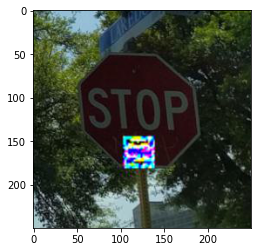

In [13]:
import matplotlib.pyplot as plt
import cv2

# img = cv2.imread('../runs/paper_results_new/real_transform_ablation/perspective_relighting_0_lambda_0.00001_patch_dim_64_mask_name_10x10/real-10x10_bottom_mapillary_load_0/octagon-915.0/image25_labels.jpg')
# img = cv2.imread('../runs/paper_results_new/real_transform_ablation/perspective_relighting_1_lambda_0.00001_patch_dim_64_mask_name_10x10/real-10x10_bottom_mapillary_load_0/octagon-915.0/image25_labels.jpg')
# img = cv2.imread('../runs/paper_results_new/real_transform_ablation/translate_scale_relighting_1_lambda_0.00001_patch_dim_64_mask_name_10x10/real-10x10_bottom_mapillary_load_0/octagon-915.0/image25_labels.jpg')
img = cv2.imread('../runs/paper_results_new/real_transform_ablation/translate_scale_relighting_0_lambda_0.00001_patch_dim_64_mask_name_10x10/real-10x10_bottom_mapillary_load_0/octagon-915.0/image25_labels.jpg')
print(img.shape)
crop_img = img[625:875, 1375:1625][...,::-1]
plt.imshow(crop_img)
img = Image.fromarray(crop_img, 'RGB')
# img.save('../paper_figures/transform_3d_relighting_0.png')
# img.save('../paper_figures/transform_3d_relighting_1.png')
# img.save('../paper_figures/transform_translate_scale_relighting_1.png')
img.save('../paper_figures/transform_translate_scale_relighting_0.png')

In [31]:
tmp_df = attack_results_per_label_df.copy()
tmp_df = tmp_df[tmp_df['label'] == class_label] 
num_positive_class_clean = len(tmp_df)
print('num_positive_class_clean', num_positive_class_clean)
tmp_df = tmp_df[
            (tmp_df['label'] == tmp_df['prediction']) &
            (tmp_df['confidence'] >=  CONFIDENCE_LEVEL) &
            (tmp_df['iou'] >= 0.5)
        ]
clean_tpr = len(tmp_df)/num_positive_class_clean
print(1-clean_tpr)


num_positive_class_clean 308
0.34090909090909094


In [32]:
tmp_df

,filename,object_id,label,correct_prediction,sign_width,sign_height,confidence,changed_from_other_label,iou,prediction,too_small,patch_num_pixels,avg_sign_size
16002,xmzivWn9fbr3uxt5VqkI0A.jpg,96.0,8.0,1,35.823486,45.088135,0.508629,0.0,0.884007,8.0,False,101.0,40.455811
16219,YXE5FnryjbuHx7tECX6Sew.jpg,33.0,8.0,1,65.470566,75.970520,0.781858,0.0,0.901774,8.0,False,249.0,70.720543
16738,d3sfcnQti5qzfm7kejaJkA.jpg,68.0,8.0,1,24.705933,29.647034,0.864957,0.0,0.920906,8.0,False,39.0,27.176483
16869,yCG_T-AVCQkssVPShBemXw.jpg,82.0,8.0,1,25.794312,30.867371,0.765456,0.0,0.917429,8.0,False,54.0,28.330841
17327,djgzFZ--52D8iS8TdYlnsw.jpg,49.0,8.0,1,63.000000,76.500000,0.804607,0.0,0.930934,8.0,False,304.0,69.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91179,Hg1wNDBp94XnQJ0SyPsVLQ.jpg,45.0,8.0,0,30.872925,70.382935,0.881410,0.0,0.539021,8.0,False,73.0,50.627930
91224,xuaGcw-4e38yQ_gZp6wHlw.jpg,79.0,8.0,1,119.169434,139.531250,0.908790,0.0,0.974034,8.0,False,1032.0,129.350342
91530,LzETMTwz7TcfJ2FmPzvMiA.jpg,35.0,8.0,1,23.463379,33.339355,0.680622,0.0,0.826155,8.0,False,49.0,28.401367
91663,7AtLlr_xSjx73lfa0VOgmw.jpg,93.0,8.0,1,56.266357,67.768311,0.668872,0.0,0.937993,8.0,False,222.0,62.017334


In [30]:
results_per_label_merged_df

,filename,object_id,label,prediction_base,confidence_base,iou_base,prediction_attack,confidence_attack,iou_attack,avg_sign_size
0,5ZfBb1cwp2LuXv_ofqMXIQ.jpg,46.0,8.0,8.0,0.839352,0.936142,NaN,NaN,NaN,NaN
1,7xKvRIFzFLfnmwMPGFjZfQ.jpg,62.0,8.0,8.0,0.914926,0.939334,NaN,NaN,NaN,NaN
2,DLkzYTAslw8m-dsCkUJezg.jpg,30.0,8.0,8.0,0.790362,0.921084,NaN,NaN,NaN,NaN
3,l_KoQJ-fQcinvOgcd1lRXw.jpg,87.0,8.0,8.0,0.585893,0.912453,NaN,NaN,NaN,NaN
4,jlzyNKfTd4bfJNh4U_fGCw.jpg,45.0,8.0,8.0,0.893314,0.904555,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
233,Hg1wNDBp94XnQJ0SyPsVLQ.jpg,45.0,8.0,8.0,0.894356,0.539771,8.0,0.881410,0.539021,50.627930
234,xuaGcw-4e38yQ_gZp6wHlw.jpg,79.0,8.0,8.0,0.905151,0.977734,8.0,0.908790,0.974034,129.350342
235,LzETMTwz7TcfJ2FmPzvMiA.jpg,35.0,8.0,8.0,0.760111,0.831798,8.0,0.680622,0.826155,28.401367
236,7AtLlr_xSjx73lfa0VOgmw.jpg,93.0,8.0,8.0,0.860127,0.950548,8.0,0.668872,0.937993,62.017334


In [5]:
# lmbd = '0.00001'
# patch_dim = 32

real_success_rates_dataframe = pd.DataFrame()
# for lmbd in ['0.1']:
#     for patch_dim in [128]:
for lmbd in ['0.00001']:
    for patch_dim in [64]:
        for class_label, shape in enumerate(shapes_arr):
            # if class_label != 8:
            #     continue
            # base_results_per_label_df = pd.read_csv(f'../runs/paper_results/real_baseline/real-10x20_bottom_mapillary_none_{class_label}/results_per_label.csv')
            base_results_per_label_df = pd.read_csv(f'../runs/paper_results/real_baseline/real-10x20_bottom_mapillary_none_0/results_per_label.csv')
            
            base_results_per_label_df = base_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou']]
            # select only signs with label 'class_label'
            base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == class_label]
            # remove synthetic signs
            base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['object_id'] != -1]
            # select signs that were predicted correctly
            # base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == base_results_per_label_df['prediction']]
            
            num_positive_class_clean = len(base_results_per_label_df)
            # print('num_positive_class_clean', num_positive_class_clean)
            base_results_per_label_df = base_results_per_label_df[
                                    (base_results_per_label_df['label'] == base_results_per_label_df['prediction']) &
                                    (base_results_per_label_df['confidence'] >=  CONFIDENCE_LEVEL) &
                                    (base_results_per_label_df['iou'] >= 0.5)
                                    ]
            clean_tpr = len(base_results_per_label_df)/num_positive_class_clean
            # print(1-clean_tpr)
            # print('patch_dim', patch_dim, '|', shape, '|',  'clean_tpr', clean_tpr)
            # ap = np.load(f'../runs/paper_results/synthetic_baseline/synthetic-10x20_bottom_mapillary_none_{class_label}/ap.npy')
            

            # attack_results_per_label_df_path = f'../runs/paper_results/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}/synthetic-10x20_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/synthetic-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # CUR_EXP_PATH="runs/paper_results/real_attack_real_gen_perspective_relighting_1_no_transform_lambda_${LMBD}_patch_dim_${PATCH_DIM}_mask_name_${MASK_NAME}"

            attack_results_per_label_df_path = f'../runs/paper_results/real_attack_real_gen_perspective_relighting_1_no_transform_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/real-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # results_df_path = f'../runs/paper_results/real_attack_real_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'

            # results_df_path = f'../runs/paper_results/real_attack_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_syn_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/synthetic-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_syn_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'

            attack_results_per_label_df = pd.read_csv(attack_results_per_label_df_path)
            
            # calculate average sign size
            attack_results_per_label_df['avg_sign_size'] = (attack_results_per_label_df['sign_width'] + attack_results_per_label_df['sign_height']) / 2
            
            attack_results_per_label_df = attack_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou', 'avg_sign_size']]
            # remove synthetic signs
            attack_results_per_label_df = attack_results_per_label_df[attack_results_per_label_df['object_id'] != -1]
            
            
            results_per_label_merged_df = base_results_per_label_df.merge(attack_results_per_label_df, on=['filename', 'object_id', 'label'], suffixes=['_base', '_attack'], how='left')

            num_correct_clean = len(results_per_label_merged_df)
            # not_correct_adversarial_df = results_per_label_merged_df[(results_per_label_merged_df['label'] != results_per_label_merged_df['prediction_attack']) | 
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['confidence_attack'] < 0.403) & (results_per_label_merged_df['iou_attack'] > 0.5)) |
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['iou_attack'] < 0.5))]
            
            correct_adversarial_df = results_per_label_merged_df[
                                (results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) &
                                (results_per_label_merged_df['confidence_attack'] >=  CONFIDENCE_LEVEL) &
                                (results_per_label_merged_df['iou_attack'] >= 0.5)
                                ]

            # correct_adversarial_df = results_per_label_merged_df[(results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) | 
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['confidence_attack'] < 0.403) & (results_per_label_merged_df['iou_attack'] > 0.5)) |
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['iou_attack'] < 0.5))]
            
            num_correct_adversarial = len(correct_adversarial_df)
            attack_success_rate = (num_correct_clean-num_correct_adversarial)/num_correct_clean
            print(attack_success_rate)

            row = {'class_label': class_label, 'shape': shape, 'lambda': lmbd, 'patch_dim': patch_dim, 'asr': attack_success_rate}
            real_success_rates_dataframe = real_success_rates_dataframe.append(row, ignore_index = True)
            
            

            


0.1613096127971296
0.49475524475524474
0.08079470198675497
0.6217105263157895
0.12206572769953052
0.5361139369277721
0.832183908045977
0.6418918918918919
0.37815126050420167
0.8095238095238095
0.17627677100494235


In [4]:
lmbd = '0.00001'
patch_dim = 64
mask_name = '10x10'

# CUR_EXP_PATH="runs/paper_results/real_attack_perspective_relighting_1_lambda_${LMBD}_patch_dim_${PATCH_DIM}_mask_name_${MASK_NAME}"
# CUR_EXP_PATH="runs/paper_results/real_attack_real_gen_perspective_relighting_1_lambda_${LMBD}_patch_dim_${PATCH_DIM}_mask_name_${MASK_NAME}"
# results_df_path = f'../runs/paper_results/real_attack_real_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'
results_df_path = f'../runs/paper_results_new/real_attack_real_gen_perspective_relighting_1_no_scale_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'
# results_df_path = f'../runs/paper_results/real_attack_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'
# results_df_path = f'../runs/results.csv'
results_df = pd.read_csv(results_df_path)

attack_results = pd.DataFrame()
# attack_results['class'] = shapes_arr
fnr_per_shape = []
for index, shape in enumerate(shapes_arr):
    fnr_per_shape.append(results_df[f'fnr_{shape}'].values[index])
attack_results['fnr'] = fnr_per_shape
attack_results



,fnr
0,0.259209
1,0.532062
2,0.085079
3,0.504948
4,0.167151
5,0.589769
6,0.924773
7,0.694289
8,0.438312
9,0.756410


In [5]:
# lmbd = '0.00001'
# patch_dim = 32

real_success_rates_dataframe = pd.DataFrame()
# for lmbd in ['0.1']:
#     for patch_dim in [128]:
for lmbd in ['0.00001']:
    for patch_dim in [64]:
        for class_label, shape in enumerate(shapes_arr):
            # if class_label != 8:
            #     continue
            # base_results_per_label_df = pd.read_csv(f'../runs/paper_results/real_baseline/real-10x20_bottom_mapillary_none_{class_label}/results_per_label.csv')
            base_results_per_label_df = pd.read_csv(f'../runs/paper_results/real_baseline/real-10x20_bottom_mapillary_none_0/results_per_label.csv')
            
            base_results_per_label_df = base_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou']]
            # select only signs with label 'class_label'
            base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == class_label]
            # remove synthetic signs
            base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['object_id'] != -1]
            # select signs that were predicted correctly
            # base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == base_results_per_label_df['prediction']]
            
            num_positive_class_clean = len(base_results_per_label_df)
            # print('num_positive_class_clean', num_positive_class_clean)
            base_results_per_label_df = base_results_per_label_df[
                                    (base_results_per_label_df['label'] == base_results_per_label_df['prediction']) &
                                    (base_results_per_label_df['confidence'] >=  CONFIDENCE_LEVEL) &
                                    (base_results_per_label_df['iou'] >= 0.5)
                                    ]
            clean_tpr = len(base_results_per_label_df)/num_positive_class_clean
            # print(1-clean_tpr)
            # print('patch_dim', patch_dim, '|', shape, '|',  'clean_tpr', clean_tpr)
            # ap = np.load(f'../runs/paper_results/synthetic_baseline/synthetic-10x20_bottom_mapillary_none_{class_label}/ap.npy')
            

            # attack_results_per_label_df_path = f'../runs/paper_results/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}/synthetic-10x20_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/synthetic-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # CUR_EXP_PATH="runs/paper_results/real_attack_real_gen_perspective_relighting_1_no_transform_lambda_${LMBD}_patch_dim_${PATCH_DIM}_mask_name_${MASK_NAME}"

            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_real_gen_perspective_relighting_1_no_transform_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/real-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'
            attack_results_per_label_df_path = f'../runs/paper_results_new/real_attack_real_gen_perspective_relighting_1_no_scale_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/real-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # results_df_path = f'../runs/paper_results/real_attack_real_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'

            # results_df_path = f'../runs/paper_results/real_attack_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_syn_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/synthetic-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'
            # attack_results_per_label_df_path = f'../runs/paper_results/real_attack_syn_gen_perspective_relighting_1_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}/results.csv'

            attack_results_per_label_df = pd.read_csv(attack_results_per_label_df_path)
            
            # calculate average sign size
            attack_results_per_label_df['avg_sign_size'] = (attack_results_per_label_df['sign_width'] + attack_results_per_label_df['sign_height']) / 2
            
            attack_results_per_label_df = attack_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou', 'avg_sign_size']]
            # remove synthetic signs
            attack_results_per_label_df = attack_results_per_label_df[attack_results_per_label_df['object_id'] != -1]
            
            
            results_per_label_merged_df = base_results_per_label_df.merge(attack_results_per_label_df, on=['filename', 'object_id', 'label'], suffixes=['_base', '_attack'], how='left')

            num_correct_clean = len(results_per_label_merged_df)
            # not_correct_adversarial_df = results_per_label_merged_df[(results_per_label_merged_df['label'] != results_per_label_merged_df['prediction_attack']) | 
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['confidence_attack'] < 0.403) & (results_per_label_merged_df['iou_attack'] > 0.5)) |
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['iou_attack'] < 0.5))]
            
            correct_adversarial_df = results_per_label_merged_df[
                                (results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) &
                                (results_per_label_merged_df['confidence_attack'] >=  CONFIDENCE_LEVEL) &
                                (results_per_label_merged_df['iou_attack'] >= 0.5)
                                ]

            # correct_adversarial_df = results_per_label_merged_df[(results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) | 
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['confidence_attack'] < 0.403) & (results_per_label_merged_df['iou_attack'] > 0.5)) |
            #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['iou_attack'] < 0.5))]
            
            num_correct_adversarial = len(correct_adversarial_df)
            attack_success_rate = (num_correct_clean-num_correct_adversarial)/num_correct_clean
            print(attack_success_rate)

            row = {'class_label': class_label, 'shape': shape, 'lambda': lmbd, 'patch_dim': patch_dim, 'asr': attack_success_rate}
            real_success_rates_dataframe = real_success_rates_dataframe.append(row, ignore_index = True)
            
            

            


0.1309612797129616
0.527972027972028
0.07947019867549669
0.5723684210526315
0.11424100156494522
0.5849440488301119
0.8873563218390804
0.668918918918919
0.35294117647058826
0.8492063492063492
0.15815485996705106


#### Patch Size Ablation

In [13]:
synthetic_patch_size_ablation_results_df = pd.DataFrame()

lmbd = '0.00001'
patch_dim = '64'

mask_names = ["10x2", "10x4", "10x6", "10x8", "10x10"]
for mask_name in mask_names:
    print()
    for class_label, shape in enumerate(shapes_arr):
        base_results_per_label_df = pd.read_csv(f'../runs/paper_results/synthetic_obj_size_ablation/baseline/patch_dim_{patch_dim}/synthetic-10x20_bottom_mapillary_none_{class_label}/results_per_label.csv')
        # base_results_per_label_df = pd.read_csv(f'../runs/paper_results/synthetic_baseline/synthetic-10x20_bottom_mapillary_none_{class_label}/results_per_label.csv')

        # base_results_per_label_df = pd.read_csv(f'../runs/paper_results/synthetic_baseline/synthetic-10x20_bottom_mapillary_none_{class_label}/results_per_label.csv')
        base_results_per_label_df = base_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou']]
        # select only synthetic signs
        base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['object_id'] == -1]
        
        num_positive_class_clean = len(base_results_per_label_df)

        # select signs that were predicted correctly
        # base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == base_results_per_label_df['prediction']]
        base_results_per_label_df = base_results_per_label_df[
                            (base_results_per_label_df['label'] == base_results_per_label_df['prediction']) &
                            (base_results_per_label_df['confidence'] >=  CONFIDENCE_LEVEL) &
                            (base_results_per_label_df['iou'] >= 0.5)
                            ]
        clean_tpr = len(base_results_per_label_df)/num_positive_class_clean
        print('patch_dim', patch_dim, '|', shape, '|',  'clean_tpr', clean_tpr)
        # ap = np.load(f'../runs/paper_results/synthetic_baseline/synthetic-10x20_bottom_mapillary_none_{class_label}/ap.npy')


        attack_results_per_label_df_path = f'../runs/paper_results/synthetic_patch_size_ablation/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}_mask_{mask_name}/synthetic-{mask_name}_bottom_mapillary_load_{class_label}/results_per_label.csv'

        # attack_results_per_label_df_path = f'../runs/paper_results/synthetic_obj_size_ablation/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}/synthetic-10x20_bottom_mapillary_load_{class_label}/results_per_label.csv'
        # attack_results_per_label_df_path = f'../runs/paper_results/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}/synthetic-10x20_bottom_mapillary_load_{class_label}/results_per_label.csv'
        # attack_results_per_label_df_path = f'../runs/paper_results/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}/synthetic-10x20_bottom_mapillary_load_{class_label}/results_per_label.csv'
        # attack_results_per_label_df_path = f'../runs/paper_results/synthetic_scale_relighting_attack_lambda_{lmbd}_patch_dim_{patch_dim}/synthetic-10x20_bottom_mapillary_load_{class_label}/results_per_label.csv'

        attack_results_per_label_df = pd.read_csv(attack_results_per_label_df_path)
        attack_results_per_label_df = attack_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou']]
        # select only synthetic signs
        attack_results_per_label_df = attack_results_per_label_df[attack_results_per_label_df['object_id'] == -1]
        attack_results_per_label_df

        results_per_label_merged_df = base_results_per_label_df.merge(attack_results_per_label_df, on=['filename', 'object_id', 'label'], suffixes=['_base', '_attack'], how='left')
        results_per_label_merged_df

        num_correct_clean = len(results_per_label_merged_df)
        
        correct_adversarial_df = results_per_label_merged_df[
                        (results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) &
                        (results_per_label_merged_df['confidence_attack'] >=  CONFIDENCE_LEVEL) &
                        (results_per_label_merged_df['iou_attack'] >= 0.5)
                        ]

        num_correct_adversarial = len(correct_adversarial_df)

        if num_correct_clean > 0:
            attack_success_rate = (num_correct_clean-num_correct_adversarial)/num_correct_clean
        else:
            attack_success_rate = 0

        row = {'class_label': class_label, 'shape': shape, 'lambda': lmbd, 'patch_dim': patch_dim, 'mask_name': mask_name, 'obj_size': patch_dim, 'asr': attack_success_rate}
        synthetic_patch_size_ablation_results_df = synthetic_patch_size_ablation_results_df.append(row, ignore_index = True)

synthetic_patch_size_ablation_results_df['mask_name_index'] = synthetic_patch_size_ablation_results_df['mask_name'].apply(lambda x: mask_names.index(x))


patch_dim 64 | circle-750.0 | clean_tpr 0.953
patch_dim 64 | triangle-900.0 | clean_tpr 0.909
patch_dim 64 | triangle_inverted-1220.0 | clean_tpr 0.6954
patch_dim 64 | diamond-600.0 | clean_tpr 0.9466
patch_dim 64 | diamond-915.0 | clean_tpr 0.7012
patch_dim 64 | square-600.0 | clean_tpr 0.9768
patch_dim 64 | rect-458.0-610.0 | clean_tpr 0.9042
patch_dim 64 | rect-762.0-915.0 | clean_tpr 0.8346
patch_dim 64 | rect-915.0-1220.0 | clean_tpr 0.9476
patch_dim 64 | pentagon-915.0 | clean_tpr 0.9738
patch_dim 64 | octagon-915.0 | clean_tpr 0.9732

patch_dim 64 | circle-750.0 | clean_tpr 0.953
patch_dim 64 | triangle-900.0 | clean_tpr 0.909
patch_dim 64 | triangle_inverted-1220.0 | clean_tpr 0.6954
patch_dim 64 | diamond-600.0 | clean_tpr 0.9466
patch_dim 64 | diamond-915.0 | clean_tpr 0.7012
patch_dim 64 | square-600.0 | clean_tpr 0.9768
patch_dim 64 | rect-458.0-610.0 | clean_tpr 0.9042
patch_dim 64 | rect-762.0-915.0 | clean_tpr 0.8346
patch_dim 64 | rect-915.0-1220.0 | clean_tpr 0.9476
p

In [14]:
synthetic_patch_size_ablation_results_df

,class_label,shape,lambda,patch_dim,mask_name,obj_size,asr,mask_name_index
0,0,circle-750.0,0.00001,64,10x2,64,0.079958,0
1,1,triangle-900.0,0.00001,64,10x2,64,0.216722,0
2,2,triangle_inverted-1220.0,0.00001,64,10x2,64,0.034513,0
3,3,diamond-600.0,0.00001,64,10x2,64,0.417494,0
4,4,diamond-915.0,0.00001,64,10x2,64,0.439817,0
5,5,square-600.0,0.00001,64,10x2,64,0.426495,0
6,6,rect-458.0-610.0,0.00001,64,10x2,64,0.879451,0
7,7,rect-762.0-915.0,0.00001,64,10x2,64,0.692547,0
8,8,rect-915.0-1220.0,0.00001,64,10x2,64,0.472562,0
9,9,pentagon-915.0,0.00001,64,10x2,64,0.201684,0


## Visualizations

In [15]:
merged_sr_df = synthetic_success_rates_dataframe.merge(real_success_rates_dataframe, on=['class_label', 'shape', 'lambda', 'patch_dim'], suffixes=['_synthetic', '_real'])
merged_sr_df.head(5)

,class_label,shape,lambda,patch_dim,asr_synthetic,asr_real
0,0,circle-750.0,0.00001,32,0.934942,0.248617
1,1,triangle-900.0,0.00001,32,0.744237,0.433566
2,2,triangle_inverted-1220.0,0.00001,32,0.376187,0.074172
3,3,diamond-600.0,0.00001,32,0.984576,0.667763
4,4,diamond-915.0,0.00001,32,0.756703,0.126761


In [22]:
merged_sr_df = merged_sr_df[~((merged_sr_df['patch_dim'] == 128) & (merged_sr_df['lambda'] == '0.1'))]

In [23]:
merged_sr_df.shape

(88, 6)

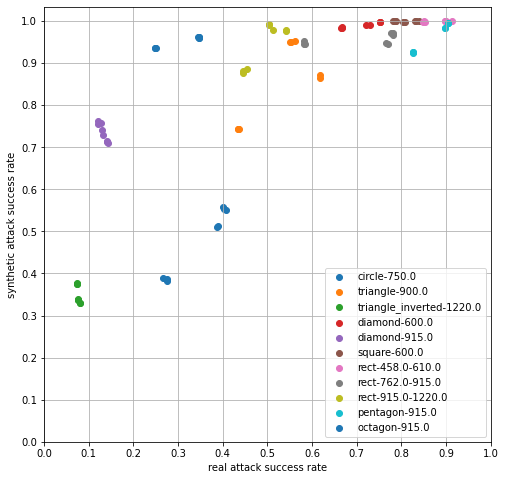

In [24]:
plt.figure(figsize=(8, 8))
for shape in merged_sr_df['shape'].unique():
    plot_df = merged_sr_df[merged_sr_df['shape'] == shape]
    plt.scatter(plot_df['asr_real'], plot_df['asr_synthetic'], label=shape)
plt.xlabel('real attack success rate')
plt.ylabel('synthetic attack success rate')
plt.xticks(np.arange(0, 1.01, 0.1))
plt.yticks(np.arange(0, 1.01, 0.1))
plt.grid()
plt.legend()

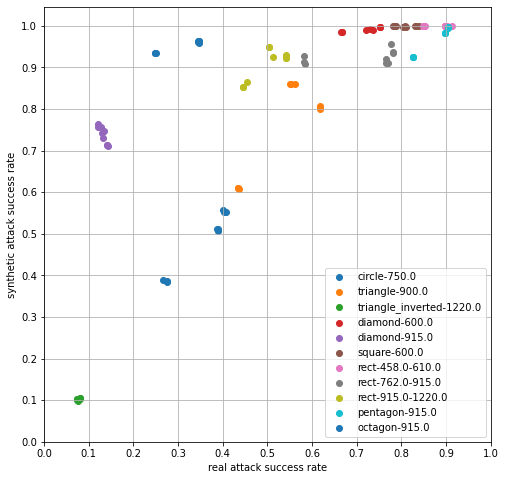

In [18]:
# sns.scatterplot(x="total_bill", y="tip")
plt.figure(figsize=(8, 8))
for shape in merged_sr_df['shape'].unique():
    plot_df = merged_sr_df[merged_sr_df['shape'] == shape]
    plt.scatter(plot_df['asr_real'], plot_df['asr_synthetic'], label=shape)
plt.xlabel('real attack success rate')
plt.ylabel('synthetic attack success rate')
plt.xticks(np.arange(0, 1.01, 0.1))
plt.yticks(np.arange(0, 1.01, 0.1))
plt.grid()
plt.legend()

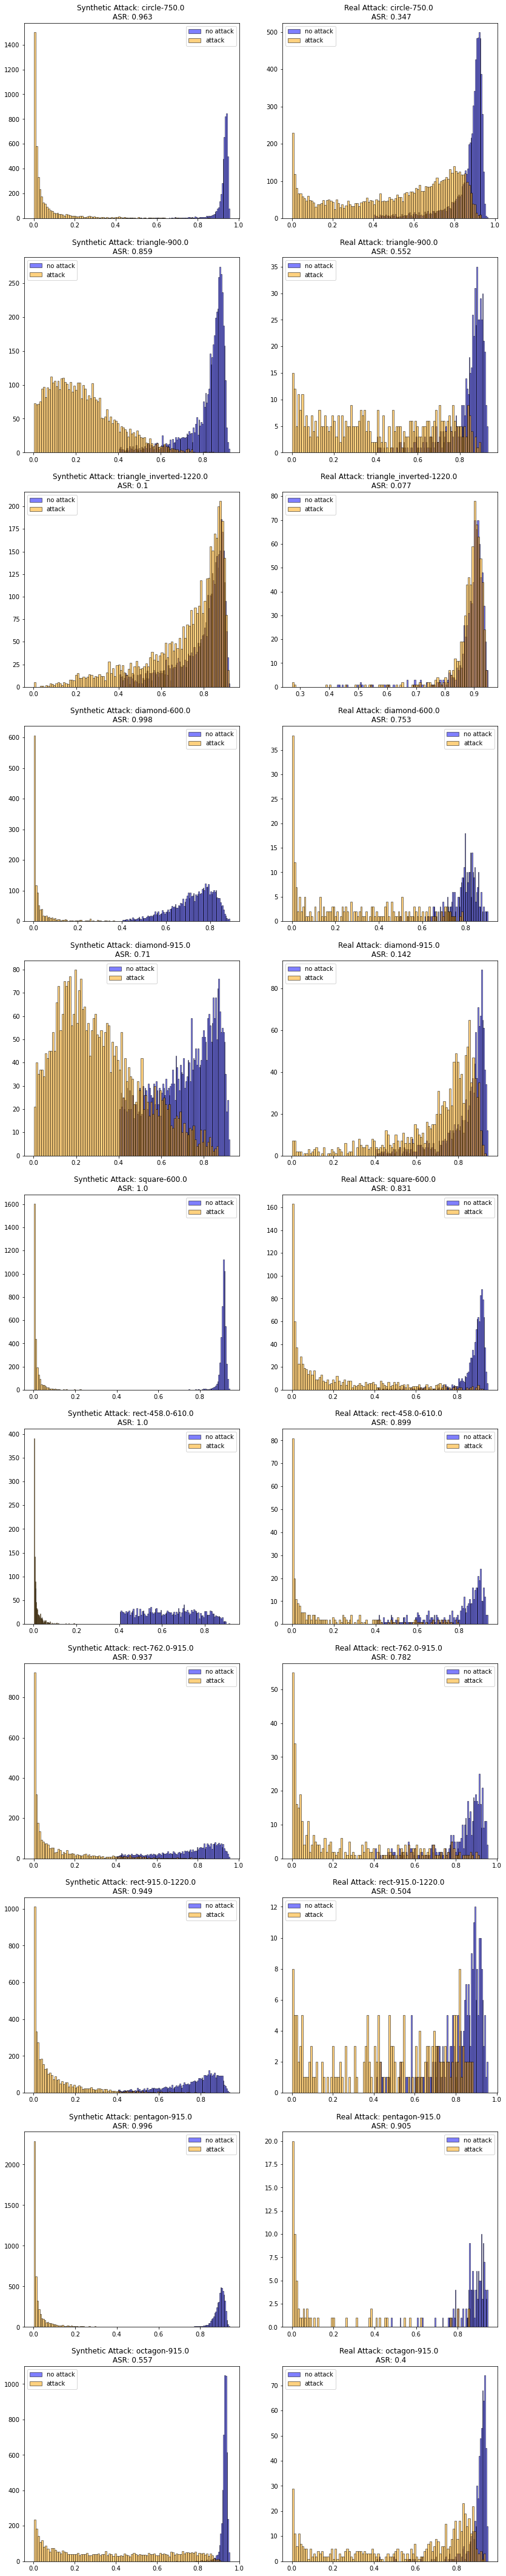

In [19]:
fig, axs = plt.subplots(11, 2, squeeze=False)
fig.set_figheight(11*7)
fig.set_figwidth(2*7)

lmbd = '0.001'
patch_dim = 64

for class_label, shape in enumerate(shapes_arr):
    base_results_per_label_df = pd.read_csv(f'../runs/paper_results/synthetic_baseline/synthetic-10x20_bottom_mapillary_none_{class_label}/results_per_label.csv')
    base_results_per_label_df = base_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou']]
    # select only synthetic signs
    base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['object_id'] == -1]
    # select signs that were predicted correctly
    # base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == base_results_per_label_df['prediction']]
    base_results_per_label_df = base_results_per_label_df[
                        (base_results_per_label_df['label'] == base_results_per_label_df['prediction']) &
                        (base_results_per_label_df['confidence'] >=  CONFIDENCE_LEVEL) &
                        (base_results_per_label_df['iou'] >= 0.5)
                        ]

    attack_results_per_label_df_path = f'../runs/paper_results/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}/synthetic-10x20_bottom_mapillary_load_{class_label}/results_per_label.csv'
    attack_results_per_label_df = pd.read_csv(attack_results_per_label_df_path)
    attack_results_per_label_df = attack_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou']]
    # select only synthetic signs
    attack_results_per_label_df = attack_results_per_label_df[attack_results_per_label_df['object_id'] == -1]

    results_per_label_merged_df = base_results_per_label_df.merge(attack_results_per_label_df, on=['filename', 'object_id', 'label'], suffixes=['_base', '_attack'], how='left')
    results_per_label_merged_df

    num_correct_clean = len(results_per_label_merged_df)
    correct_adversarial_df = results_per_label_merged_df[
                    (results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) &
                    (results_per_label_merged_df['confidence_attack'] >=  CONFIDENCE_LEVEL) &
                    (results_per_label_merged_df['iou_attack'] >= 0.5)
                    ]

    num_correct_adversarial = len(correct_adversarial_df)
    attack_success_rate = (num_correct_clean-num_correct_adversarial)/num_correct_clean

    axs[class_label, 0].hist(results_per_label_merged_df['confidence_base'], color = 'blue', edgecolor = 'black', bins=100, alpha=0.5, label='no attack')
    axs[class_label, 0].hist(results_per_label_merged_df['confidence_attack'], color = 'orange', edgecolor = 'black', bins=100, alpha=0.5, label='attack')
    axs[class_label, 0].set_title(f'Synthetic Attack: {shape} \n ASR: {np.round(attack_success_rate, 3)}')

    axs[class_label, 0].legend()

for class_label, shape in enumerate(shapes_arr):
    # base_results_per_label_df = pd.read_csv(f'../runs/paper_results/real_baseline/real-10x20_bottom_mapillary_none_{class_label}/results_per_label.csv')
    base_results_per_label_df = pd.read_csv(f'../runs/paper_results/real_baseline/real-10x20_bottom_mapillary_none_0/results_per_label.csv')
    
    base_results_per_label_df = base_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou']]
    # select only signs with label 'class_label'
    base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == class_label]
    # remove synthetic signs
    base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['object_id'] != -1]
    # select signs that were predicted correctly
    # base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == base_results_per_label_df['prediction']]

    base_results_per_label_df = base_results_per_label_df[
                            (base_results_per_label_df['label'] == base_results_per_label_df['prediction']) &
                            (base_results_per_label_df['confidence'] >=  CONFIDENCE_LEVEL) &
                            (base_results_per_label_df['iou'] >= 0.5)
                            ]

    # ap = np.load(f'../runs/paper_results/synthetic_baseline/synthetic-10x20_bottom_mapillary_none_{class_label}/ap.npy')
    

    attack_results_per_label_df_path = f'../runs/paper_results/real_attack_perspective_relighting_lambda_{lmbd}_patch_dim_{patch_dim}/real-10x20_bottom_mapillary_load_{class_label}/results_per_label.csv'

    attack_results_per_label_df = pd.read_csv(attack_results_per_label_df_path)
    
    # calculate average sign size
    attack_results_per_label_df['avg_sign_size'] = (attack_results_per_label_df['sign_width'] + attack_results_per_label_df['sign_height']) / 2

    attack_results_per_label_df = attack_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou', 'avg_sign_size']]
    # remove synthetic signs
    attack_results_per_label_df = attack_results_per_label_df[attack_results_per_label_df['object_id'] != -1]
    
    results_per_label_merged_df = base_results_per_label_df.merge(attack_results_per_label_df, on=['filename', 'object_id', 'label'], suffixes=['_base', '_attack'], how='left')

    num_correct_clean = len(results_per_label_merged_df)
    # not_correct_adversarial_df = results_per_label_merged_df[(results_per_label_merged_df['label'] != results_per_label_merged_df['prediction_attack']) | 
    #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['confidence_attack'] < 0.403) & (results_per_label_merged_df['iou_attack'] > 0.5)) |
    #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['iou_attack'] < 0.5))]
    
    correct_adversarial_df = results_per_label_merged_df[
                        (results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) &
                        (results_per_label_merged_df['confidence_attack'] >=  CONFIDENCE_LEVEL) &
                        (results_per_label_merged_df['iou_attack'] >= 0.5)
                        ]

    # correct_adversarial_df = results_per_label_merged_df[(results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) | 
    #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['confidence_attack'] < 0.403) & (results_per_label_merged_df['iou_attack'] > 0.5)) |
    #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['iou_attack'] < 0.5))]
    
    num_correct_adversarial = len(correct_adversarial_df)
    attack_success_rate = (num_correct_clean-num_correct_adversarial)/num_correct_clean
    
    axs[class_label, 1].hist(results_per_label_merged_df['confidence_base'], color = 'blue', edgecolor = 'black', bins=100, alpha=0.5, label='no attack')
    axs[class_label, 1].hist(results_per_label_merged_df['confidence_attack'], color = 'orange', edgecolor = 'black', bins=100, alpha=0.5, label='attack')
    axs[class_label, 1].set_title(f'Real Attack: {shape} \n ASR: {np.round(attack_success_rate, 3)}')
    axs[class_label, 1].legend()

plt.show();


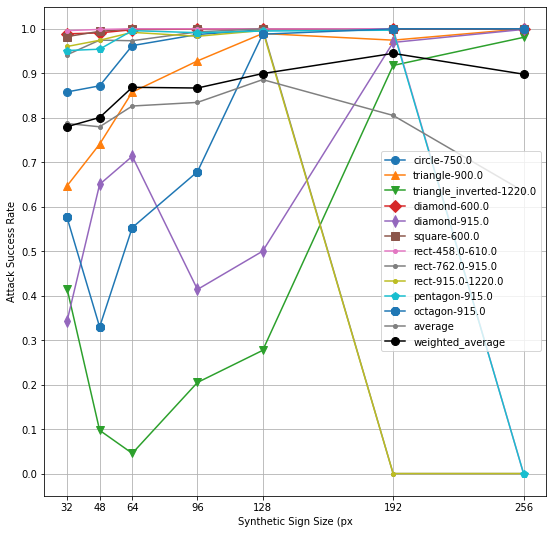

In [47]:
plt.figure(figsize=(9, 9))
markers = ['o', '^', 'v', 'D', 'd', 's', '.', '.', '.', 'p', '8']
for class_label, shape in enumerate(shapes_arr):
    plot_df = synthetic_obj_size_ablation_results_df[synthetic_obj_size_ablation_results_df['class_label'] == class_label]
    plt.plot(plot_df['obj_size'], plot_df['asr'], label=shape, marker=markers[class_label], markersize=8)

mean_grouped_df = synthetic_obj_size_ablation_results_df.groupby(by=['patch_dim']).mean().reset_index()
plt.plot(mean_grouped_df['obj_size'], mean_grouped_df['asr'], label='average', marker='.', markersize=8, color='grey')

synthetic_obj_size_ablation_results_df['class_weight'] = synthetic_obj_size_ablation_results_df['shape'].map(MAPILLARY_LABEL_COUNTS_DICT)
synthetic_obj_size_ablation_results_df['asr_x_class_weight'] = synthetic_obj_size_ablation_results_df['asr'] * synthetic_obj_size_ablation_results_df['class_weight']
weighted_mean_grouped_df = synthetic_obj_size_ablation_results_df.groupby(by=['patch_dim']).agg({'asr_x_class_weight': 'sum', 'obj_size': 'mean'}).reset_index()
weighted_mean_grouped_df['asr_x_class_weight'] = weighted_mean_grouped_df['asr_x_class_weight'] / MAPILLARY_NON_OTHER_LABEL_COUNTS
plt.plot(weighted_mean_grouped_df['obj_size'], weighted_mean_grouped_df['asr_x_class_weight'], label='weighted_average', marker='o', markersize=8, color='black')


plt.xlabel('Synthetic Sign Size (px)')
plt.ylabel('Attack Success Rate')
plt.legend()
plt.yticks(np.arange(0, 1.01, 0.1))
plt.xticks(plot_df['obj_size'])
plt.grid()

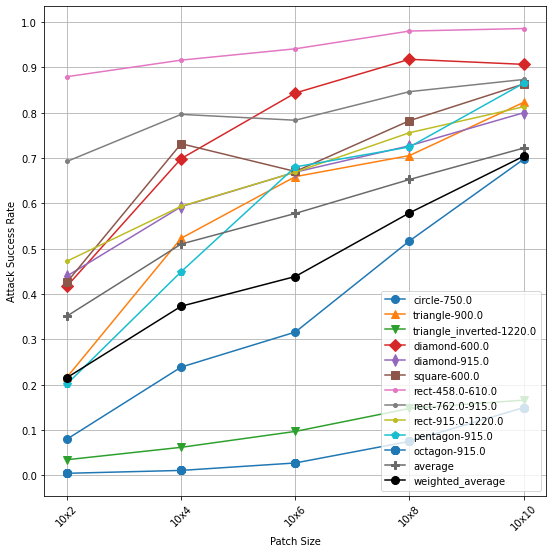

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9)) 

markers = ['o', '^', 'v', 'D', 'd', 's', '.', '.', '.', 'p', '8']
for class_label, shape in enumerate(shapes_arr):
    plot_df = synthetic_patch_size_ablation_results_df[synthetic_patch_size_ablation_results_df['class_label'] == class_label]
    ax.plot(plot_df['mask_name_index'], plot_df['asr'], label=shape, marker=markers[class_label], markersize=8)

mean_grouped_df = synthetic_patch_size_ablation_results_df.groupby(by=['mask_name_index']).mean().reset_index()
ax.plot(mean_grouped_df['mask_name_index'], mean_grouped_df['asr'], label='average', marker='P', markersize=8, color='dimgrey')

synthetic_patch_size_ablation_results_df['class_weight'] = synthetic_patch_size_ablation_results_df['shape'].map(MAPILLARY_LABEL_COUNTS_DICT)
synthetic_patch_size_ablation_results_df['asr_x_class_weight'] = synthetic_patch_size_ablation_results_df['asr'] * synthetic_patch_size_ablation_results_df['class_weight']
weighted_mean_grouped_df = synthetic_patch_size_ablation_results_df.groupby(by=['mask_name_index']).agg({'asr_x_class_weight': 'sum'}).reset_index()
weighted_mean_grouped_df['asr_x_class_weight'] = weighted_mean_grouped_df['asr_x_class_weight'] / MAPILLARY_NON_OTHER_LABEL_COUNTS
ax.plot(weighted_mean_grouped_df['mask_name_index'], weighted_mean_grouped_df['asr_x_class_weight'], label='weighted_average', marker='o', markersize=8, color='black')

ax.set_xlabel('Patch Size')
ax.set_ylabel('Attack Success Rate')
ax.legend()
ax.set_yticks(np.arange(0, 1.01, 0.1))
ax.set_xticks(np.arange(len(mask_names)))
ax.set_xticklabels(mask_names, rotation=45)
ax.grid()

In [ ]:
fig, axs = plt.subplots(11, 2, squeeze=False)
fig.set_figheight(11*7)
fig.set_figwidth(2*7)

lmbd = '0.001'
patch_dim = 64

for class_label, shape in enumerate(shapes_arr):
    base_results_per_label_df = pd.read_csv(f'../runs/paper_results/synthetic_baseline/synthetic-10x20_bottom_mapillary_none_{class_label}/results_per_label.csv')
    base_results_per_label_df = base_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou']]
    # select only synthetic signs
    base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['object_id'] == -1]
    # select signs that were predicted correctly
    # base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == base_results_per_label_df['prediction']]
    base_results_per_label_df = base_results_per_label_df[
                        (base_results_per_label_df['label'] == base_results_per_label_df['prediction']) &
                        (base_results_per_label_df['confidence'] >=  CONFIDENCE_LEVEL) &
                        (base_results_per_label_df['iou'] >= 0.5)
                        ]

    attack_results_per_label_df_path = f'../runs/paper_results/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}/synthetic-10x20_bottom_mapillary_load_{class_label}/results_per_label.csv'
    attack_results_per_label_df = pd.read_csv(attack_results_per_label_df_path)
    attack_results_per_label_df = attack_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou']]
    # select only synthetic signs
    attack_results_per_label_df = attack_results_per_label_df[attack_results_per_label_df['object_id'] == -1]

    results_per_label_merged_df = base_results_per_label_df.merge(attack_results_per_label_df, on=['filename', 'object_id', 'label'], suffixes=['_base', '_attack'], how='left')
    results_per_label_merged_df

    num_correct_clean = len(results_per_label_merged_df)
    correct_adversarial_df = results_per_label_merged_df[
                    (results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) &
                    (results_per_label_merged_df['confidence_attack'] >=  CONFIDENCE_LEVEL) &
                    (results_per_label_merged_df['iou_attack'] >= 0.5)
                    ]

    num_correct_adversarial = len(correct_adversarial_df)
    attack_success_rate = (num_correct_clean-num_correct_adversarial)/num_correct_clean

    axs[class_label, 0].hist(results_per_label_merged_df['confidence_base'], color = 'blue', edgecolor = 'black', bins=100, alpha=0.5, label='no attack')
    axs[class_label, 0].hist(results_per_label_merged_df['confidence_attack'], color = 'orange', edgecolor = 'black', bins=100, alpha=0.5, label='attack')
    axs[class_label, 0].set_title(f'Synthetic Attack: {shape} \n ASR: {np.round(attack_success_rate, 3)}')

    axs[class_label, 0].legend()

for class_label, shape in enumerate(shapes_arr):
    # base_results_per_label_df = pd.read_csv(f'../runs/paper_results/real_baseline/real-10x20_bottom_mapillary_none_{class_label}/results_per_label.csv')
    base_results_per_label_df = pd.read_csv(f'../runs/paper_results/real_baseline/real-10x20_bottom_mapillary_none_0/results_per_label.csv')
    
    base_results_per_label_df = base_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou']]
    # select only signs with label 'class_label'
    base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == class_label]
    # remove synthetic signs
    base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['object_id'] != -1]
    # select signs that were predicted correctly
    # base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == base_results_per_label_df['prediction']]

    base_results_per_label_df = base_results_per_label_df[
                            (base_results_per_label_df['label'] == base_results_per_label_df['prediction']) &
                            (base_results_per_label_df['confidence'] >=  CONFIDENCE_LEVEL) &
                            (base_results_per_label_df['iou'] >= 0.5)
                            ]

    # ap = np.load(f'../runs/paper_results/synthetic_baseline/synthetic-10x20_bottom_mapillary_none_{class_label}/ap.npy')
    

    attack_results_per_label_df_path = f'../runs/paper_results/real_attack_perspective_relighting_lambda_{lmbd}_patch_dim_{patch_dim}/real-10x20_bottom_mapillary_load_{class_label}/results_per_label.csv'

    attack_results_per_label_df = pd.read_csv(attack_results_per_label_df_path)
    
    # calculate average sign size
    attack_results_per_label_df['avg_sign_size'] = (attack_results_per_label_df['sign_width'] + attack_results_per_label_df['sign_height']) / 2

    attack_results_per_label_df = attack_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou', 'avg_sign_size']]
    # remove synthetic signs
    attack_results_per_label_df = attack_results_per_label_df[attack_results_per_label_df['object_id'] != -1]
    
    results_per_label_merged_df = base_results_per_label_df.merge(attack_results_per_label_df, on=['filename', 'object_id', 'label'], suffixes=['_base', '_attack'], how='left')

    num_correct_clean = len(results_per_label_merged_df)
    # not_correct_adversarial_df = results_per_label_merged_df[(results_per_label_merged_df['label'] != results_per_label_merged_df['prediction_attack']) | 
    #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['confidence_attack'] < 0.403) & (results_per_label_merged_df['iou_attack'] > 0.5)) |
    #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['iou_attack'] < 0.5))]
    
    correct_adversarial_df = results_per_label_merged_df[
                        (results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) &
                        (results_per_label_merged_df['confidence_attack'] >=  CONFIDENCE_LEVEL) &
                        (results_per_label_merged_df['iou_attack'] >= 0.5)
                        ]

    # correct_adversarial_df = results_per_label_merged_df[(results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) | 
    #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['confidence_attack'] < 0.403) & (results_per_label_merged_df['iou_attack'] > 0.5)) |
    #                                 ((results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) & (results_per_label_merged_df['iou_attack'] < 0.5))]
    
    num_correct_adversarial = len(correct_adversarial_df)
    attack_success_rate = (num_correct_clean-num_correct_adversarial)/num_correct_clean
    
    axs[class_label, 1].hist(results_per_label_merged_df['confidence_base'], color = 'blue', edgecolor = 'black', bins=100, alpha=0.5, label='no attack')
    axs[class_label, 1].hist(results_per_label_merged_df['confidence_attack'], color = 'orange', edgecolor = 'black', bins=100, alpha=0.5, label='attack')
    axs[class_label, 1].set_title(f'Real Attack: {shape} \n ASR: {np.round(attack_success_rate, 3)}')
    axs[class_label, 1].legend()

plt.show();


In [35]:
updated_shapes = ["triangle-900.0", "triangle_inverted-1220.0", "rect-458.0-610.0", "rect-762.0-915.0", "rect-915.0-1220.0"]
updated_shapes_classes = [1, 2, 6, 7, 8]

In [36]:
lmbd = '0.001'
patch_dim = 128
csv_path = f'../runs/paper_results/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}/results.csv'
old_df = pd.read_csv(csv_path)
old_df.to_csv(f'../runs/paper_results/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}/results_before_update.csv', index=False)
# good_df.to_csv('../runs/paper_results/synthetic_tl_rt_attack_lambda_0.1_patch_dim_128/results_has_error.csv', index=False)
old_df

,num_images,num_targets_all,precision_all,recall_all,map_50_all,map_50_95_all,precision_cmb,fnr_cmb,fp_cmb,min_area,...,tp_synthetic,fn_synthetic,ap_50_synthetic,ap_50_95_synthetic,fp_synthetic,dataset,total_num_patches,name,apply_patch,random_patch
0,5000,13774,0.886028,0.618693,0.762397,0.566006,0.845218,0.561130,1107.0,0,...,190.0,4810.0,0.893597,0.707334,0.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_0,True,False
1,5000,13774,0.884083,0.629798,0.760941,0.567325,0.845807,0.509365,1232.0,0,...,900.0,4100.0,0.930583,0.755557,7.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_1,True,False
2,5000,13774,0.882311,0.676495,0.764993,0.559998,0.885540,0.304632,1238.0,0,...,3699.0,1301.0,0.945895,0.652738,125.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_2,True,False
3,5000,13774,0.885171,0.616695,0.737295,0.542203,0.841985,0.571366,1108.0,0,...,44.0,4956.0,0.590125,0.416797,1.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_3,True,False
4,5000,13774,0.885110,0.631196,0.767971,0.580953,0.858422,0.505663,1123.0,0,...,950.0,4050.0,0.957531,0.884886,16.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_4,True,False
5,5000,13774,0.886665,0.614834,0.747545,0.556035,0.842196,0.574561,1098.0,0,...,8.0,4992.0,0.712127,0.591010,0.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_5,True,False
6,5000,13774,0.885218,0.614721,0.736383,0.536445,0.836073,0.575287,1147.0,0,...,0.0,5000.0,0.593543,0.365795,0.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_0,True,False
7,5000,13774,0.881219,0.620404,0.756644,0.567748,0.813757,0.553361,1408.0,0,...,297.0,4703.0,0.870673,0.761155,0.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_7,True,False
8,5000,13774,0.839424,0.620318,0.749186,0.566772,0.785161,0.551329,1691.0,0,...,329.0,4671.0,0.935646,0.860567,5.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_8,True,False
9,5000,13774,0.839757,0.616615,0.746936,0.562413,0.609128,0.568825,3811.0,0,...,81.0,4919.0,0.939264,0.795069,1.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_9,True,False


In [37]:
new_lines_df = pd.read_csv('../runs/results.csv')
new_lines_df

,num_images,num_targets_all,precision_all,recall_all,map_50_all,map_50_95_all,precision_cmb,fnr_cmb,fp_cmb,min_area,...,tp_synthetic,fn_synthetic,ap_50_synthetic,ap_50_95_synthetic,fp_synthetic,dataset,total_num_patches,name,apply_patch,random_patch
0,5000,13774,0.876859,0.625590,0.755082,0.560544,0.790539,0.529258,1718.0,0,...,628.0,4372.0,0.881510,0.686047,2.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_0,True,False
1,5000,13774,0.883521,0.660761,0.765223,0.570051,0.878572,0.372804,1194.0,0,...,2760.0,2240.0,0.939628,0.766388,85.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_1,True,False
2,5000,13774,0.885197,0.614720,0.736349,0.536416,0.835953,0.575287,1148.0,0,...,0.0,5000.0,0.593197,0.365464,0.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_2,True,False
3,5000,13774,0.883971,0.618122,0.753429,0.563374,0.829825,0.562073,1237.0,0,...,180.0,4820.0,0.829981,0.708377,0.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_3,True,False
4,5000,13774,0.839304,0.615762,0.748884,0.565083,0.651883,0.568898,3171.0,0,...,91.0,4909.0,0.929408,0.831139,0.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_4,True,False


In [38]:
for index, class_label in enumerate(updated_shapes_classes):
    old_df.iloc[class_label] = new_lines_df.iloc[index]

In [39]:
old_df

,num_images,num_targets_all,precision_all,recall_all,map_50_all,map_50_95_all,precision_cmb,fnr_cmb,fp_cmb,min_area,...,tp_synthetic,fn_synthetic,ap_50_synthetic,ap_50_95_synthetic,fp_synthetic,dataset,total_num_patches,name,apply_patch,random_patch
0,5000,13774,0.886028,0.618693,0.762397,0.566006,0.845218,0.561130,1107.0,0,...,190.0,4810.0,0.893597,0.707334,0.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_0,True,False
1,5000,13774,0.876859,0.625590,0.755082,0.560544,0.790539,0.529258,1718.0,0,...,628.0,4372.0,0.881510,0.686047,2.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_0,True,False
2,5000,13774,0.883521,0.660761,0.765223,0.570051,0.878572,0.372804,1194.0,0,...,2760.0,2240.0,0.939628,0.766388,85.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_1,True,False
3,5000,13774,0.885171,0.616695,0.737295,0.542203,0.841985,0.571366,1108.0,0,...,44.0,4956.0,0.590125,0.416797,1.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_3,True,False
4,5000,13774,0.885110,0.631196,0.767971,0.580953,0.858422,0.505663,1123.0,0,...,950.0,4050.0,0.957531,0.884886,16.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_4,True,False
5,5000,13774,0.886665,0.614834,0.747545,0.556035,0.842196,0.574561,1098.0,0,...,8.0,4992.0,0.712127,0.591010,0.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_5,True,False
6,5000,13774,0.885197,0.614720,0.736349,0.536416,0.835953,0.575287,1148.0,0,...,0.0,5000.0,0.593197,0.365464,0.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_2,True,False
7,5000,13774,0.883971,0.618122,0.753429,0.563374,0.829825,0.562073,1237.0,0,...,180.0,4820.0,0.829981,0.708377,0.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_3,True,False
8,5000,13774,0.839304,0.615762,0.748884,0.565083,0.651883,0.568898,3171.0,0,...,91.0,4909.0,0.929408,0.831139,0.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_4,True,False
9,5000,13774,0.839757,0.616615,0.746936,0.562413,0.609128,0.568825,3811.0,0,...,81.0,4919.0,0.939264,0.795069,1.0,mapillary,0,synthetic-10x20_bottom_mapillary_load_9,True,False


In [40]:
csv_path = f'../runs/paper_results/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}/results_updated.csv'
old_df.to_csv(csv_path, index=False)

In [4]:
results_df = pd.read_csv(f'../runs/synthetic_0_test_no_attack_lambda/results.csv')
results_df

no_attack_results_mean_obj_size = pd.DataFrame()
no_attack_results_mean_obj_size['class'] = shapes_arr
no_attack_results_mean_obj_size['fnr_obj_size_64_rotation_none'] = results_df['fnr_synthetic'].values

results_df = pd.read_csv(f'../runs/synthetic_15_test_no_attack_lambda/results.csv')
no_attack_results_mean_obj_size['fnr_obj_size_64_rotation_15'] = results_df['fnr_synthetic'].values


results_df = pd.read_csv(f'../runs/exp2.csv')
# no_attack_results_mean_obj_size['obj_size_64'] = 64
no_attack_results_mean_obj_size['fnr_obj_size_64_rotation_30'] = results_df.iloc[np.arange(1, 22, 2)]['fnr_synthetic'].values
no_attack_results_mean_obj_size

,class,fnr_obj_size_64_rotation_none,fnr_obj_size_64_rotation_15,fnr_obj_size_64_rotation_30
0,circle-750.0,0.050307,0.047000,0.052513
1,triangle-900.0,0.065005,0.080361,0.140740
2,triangle_inverted-1220.0,0.037998,0.178847,0.561306
3,diamond-600.0,0.034509,0.053430,0.432736
4,diamond-915.0,0.291060,0.299021,0.562373
5,square-600.0,0.025400,0.023200,0.235387
6,rect-458.0-610.0,0.652068,0.548273,0.498648
7,rect-762.0-915.0,0.245373,0.332392,0.524641
8,rect-915.0-1220.0,0.238165,0.149289,0.215165
9,pentagon-915.0,0.027001,0.026140,0.182037


In [3]:
shapes_dims_arr=[35, 45, 42, 32, 43, 43, 30, 41, 39, 52, 58]

# no_attack_results = pd.DataFrame()
results_df = pd.read_csv(f'../runs/results_baseline_mean_obj_size.csv')
# results_df

no_attack_results_mean_obj_size = pd.DataFrame()
no_attack_results_mean_obj_size['class'] = shapes_arr
no_attack_results_mean_obj_size['obj_size_mean'] = shapes_dims_arr
no_attack_results_mean_obj_size['fnr_obj_size_mean'] = results_df['fnr_synthetic'].values
no_attack_results_mean_obj_size


results_df = pd.read_csv(f'../runs/exp2.csv')
# no_attack_results_mean_obj_size['obj_size_64'] = 64
no_attack_results_mean_obj_size['fnr_obj_size_64'] = results_df.iloc[np.arange(1, 22, 2)]['fnr_synthetic'].values

results_df = pd.read_csv(f'../runs/exp1.csv')
# no_attack_results_mean_obj_size['obj_size_128'] = 128
no_attack_results_mean_obj_size['fnr_obj_size_128'] = results_df.iloc[np.arange(1, 22, 2)]['fnr_synthetic'].values

results_df = pd.read_csv(f'../runs/exp0.csv')
# no_attack_results_mean_obj_size['obj_size_256'] = 256
no_attack_results_mean_obj_size['fnr_obj_size_256'] = results_df.iloc[np.arange(1, 22, 2)]['fnr_synthetic'].values
no_attack_results_mean_obj_size

,class,obj_size_mean,fnr_obj_size_mean,fnr_obj_size_64,fnr_obj_size_128,fnr_obj_size_256
0,circle-750.0,35,0.281231,0.052513,0.013014,0.347497
1,triangle-900.0,45,0.266608,0.140740,0.062007,0.052572
2,triangle_inverted-1220.0,42,0.735396,0.561306,0.436170,0.531560
3,diamond-600.0,32,0.527945,0.432736,0.367200,0.934000
4,diamond-915.0,43,0.631310,0.562373,0.310292,0.253327
5,square-600.0,43,0.368553,0.235387,0.172494,0.667353
6,rect-458.0-610.0,30,0.796924,0.498648,0.869929,1.000000
7,rect-762.0-915.0,41,0.510363,0.524641,1.000000,1.000000
8,rect-915.0-1220.0,39,0.416526,0.215165,0.997182,0.000000
9,pentagon-915.0,52,0.220351,0.182037,0.233815,1.000000


In [10]:
# no_attack_results = pd.DataFrame()
results_df = pd.read_csv(f'../runs/exp0.csv')
no_attack_results_obj_size_256 = pd.DataFrame()
no_attack_results_obj_size_256['class'] = shapes_arr
no_attack_results_obj_size_256['obj_size'] = 256
no_attack_results_obj_size_256['fnr'] = results_df.iloc[np.arange(1, 22, 2)]['fnr_synthetic'].values

results_df = pd.read_csv(f'../runs/exp1.csv')
no_attack_results_obj_size_128 = pd.DataFrame()
no_attack_results_obj_size_128['class'] = shapes_arr
no_attack_results_obj_size_128['obj_size'] = 128
no_attack_results_obj_size_128['fnr'] = results_df.iloc[np.arange(1, 22, 2)]['fnr_synthetic'].values

results_df = pd.read_csv(f'../runs/exp2.csv')
no_attack_results_obj_size_64 = pd.DataFrame()
no_attack_results_obj_size_64['class'] = shapes_arr
no_attack_results_obj_size_64['obj_size'] = 64
no_attack_results_obj_size_64['fnr'] = results_df.iloc[np.arange(1, 22, 2)]['fnr_synthetic'].values


no_attack_results = pd.concat([no_attack_results_obj_size_256, no_attack_results_obj_size_128, no_attack_results_obj_size_64], axis=0)


In [6]:
np.load('/datadrive/nab_126/adv-patch-bench/runs/synthetic_3d_no_relighting_lambda_0.1_patch_dim_32/synthetic-10x20_bottom_mapillary_load_0/ap.npy').shape

(12, 10)

In [6]:
# data = pd.read_csv('../runs/paper_results/synthetic_baseline/synthetic-10x20_bottom_mapillary_none_0/results_per_label.csv')
data = pd.read_csv('../runs/paper_results/synthetic_baseline/synthetic-10x20_bottom_mapillary_none_0/results_per_label.csv')
data[data['object_id'] == -1][['filename', 'object_id', 'label', 'correct_prediction', 'confidence', 'iou', 'prediction']]

,filename,object_id,label,correct_prediction,confidence,iou,prediction
1,bDtPvveUyz0PHka-ssj7ug.jpg,-1.0,12.0,0,0.940342,0.947381,12.0
6,X6ecNuJIbb7OXPtzsVJryA.jpg,-1.0,12.0,0,0.932781,0.927235,12.0
10,fgxUAUqeRCCLL4sH-tgC2A.jpg,-1.0,12.0,0,0.931727,0.931586,12.0
13,36iNN_5lKC_CrOiFjmcF9w.jpg,-1.0,12.0,0,0.913348,0.927460,12.0
19,4dJUlF0yIABNXB0WVh2cpg.jpg,-1.0,12.0,0,0.940903,0.921262,12.0
...,...,...,...,...,...,...,...
30598,z-hX68SaL_UB2rniuzVn4A.jpg,-1.0,12.0,0,0.934442,0.899641,12.0
30604,a9nvf9bxE-wTE7eTWDC56w.jpg,-1.0,12.0,0,0.930661,0.924332,12.0
30610,a9qArCUisTbHQoxJYK3u_Q.jpg,-1.0,12.0,0,0.194057,0.921754,12.0
30612,a9qI5JKP_9IR_6giHhGagg.jpg,-1.0,12.0,0,0.690325,0.900565,12.0


In [7]:
data = pd.read_csv('../runs/results.csv')
fnr_columns = [col for col in list(data.columns) if 'fnr' in col]
fnr_columns
data[fnr_columns].transpose()

,0
fnr_cmb,0.146105
fnr_circle-750.0,0.153398
fnr_triangle-900.0,0.092063
fnr_triangle_inverted-1220.0,0.082625
fnr_diamond-600.0,0.037975
fnr_diamond-915.0,0.107542
fnr_square-600.0,0.083022
fnr_rect-458.0-610.0,0.390756
fnr_rect-762.0-915.0,0.177778
fnr_rect-915.0-1220.0,0.340720


In [9]:
# no_attack_results[no_attack_results['obj_size'] == 256][['fnr']]

In [10]:
# synthetic
concat_results = pd.DataFrame()

i = 0
for lmbd in [1e-5, 1e-3, 1e-1]:
    for patch_dim in [32, 64, 128]:
        for obj_size in [256, 128, 64]:
# for i in range(0, 27):
            df_name = f'exp{i}'
            
            # print('df_name:', df_name)
            # print('lmbd:', lmbd)
            # print('patch_dim:', patch_dim)
            # print('obj_size:', obj_size)
            i += 1
            results_df = pd.read_csv(f'../runs/{df_name}.csv')
            results_df[['name', 'max_f1_index', 'map_50_all', 'map_50_95_all', 'fnr_cmb', 'ap_50_octagon-915.0', 'fnr_octagon-915.0', 'fn_octagon-915.0', 'fp_octagon-915.0', 'total_num_patches']]
            # print(df_name, len(results_df))

            # if len(results_df) == 22:
            
            class_index = 0
            for _, row in results_df.iterrows():
                if 'load' in row['name']:
                    fnr = row['fnr_synthetic']
                    row = {'lmbd': lmbd, 'patch_dim': patch_dim, 'obj_size': obj_size, 'class':shapes_arr[class_index], 'class_index': class_index, 'fnr': fnr}
                    concat_results = concat_results.append(row, ignore_index=True)
                    class_index += 1
                    
            
# results_df[['name', 'num_images', 'max_f1_index', 'map_50_all', 'map_50_95_all', 'fnr_cmb', 'total_num_patches', 'fnr_synthetic', 'ap_50_synthetic', 'ap_50_95_synthetic']]


In [41]:
lmbd = 1e-1
patch_dim = 128
tmp_df = concat_results[(concat_results['obj_size'] == 64) & (concat_results['lmbd'] == lmbd) & (concat_results['patch_dim'] == patch_dim)]
# tmp_df = concat_results[(concat_results['obj_size'] == 128) & (concat_results['lmbd'] == lmbd) & (concat_results['patch_dim'] == patch_dim)]
# tmp_df = concat_results[(concat_results['obj_size'] == 256) & (concat_results['lmbd'] == lmbd) & (concat_results['patch_dim'] == patch_dim)]
tmp_df[['fnr']]
# no_attack_results[no_attack_results['obj_size'] == 256][['fnr']]

,fnr
286,0.933643
287,0.857255
288,0.603114
289,0.985753
290,0.851170
291,0.999732
292,0.738382
293,0.948108
294,0.917808
295,0.980491


In [4]:
# synthetic
concat_results = pd.DataFrame()

# i = 0
# for lmbd in [1e-5, 1e-3, 1e-1]:
for lmbd in ['0.00001', '0.001', '0.1']:
    for patch_dim in [32, 64, 128]:
        for obj_size in [256, 128, 64]:
            # df_name = f'exp{i}'
            # i += 1
            df_name=f"../runs/synthetic_tl_scal_relighting_lambda_{lmbd}_patch_dim_{patch_dim}_obj_size_{obj_size}/results.csv"
            results_df = pd.read_csv(df_name)
            # results_df[['name', 'max_f1_index', 'map_50_all', 'map_50_95_all', 'fnr_cmb', 'ap_50_octagon-915.0', 'fnr_octagon-915.0', 'fn_octagon-915.0', 'fp_octagon-915.0', 'total_num_patches']]
            # print(df_name, len(results_df))

            # if len(results_df) == 22:
            
            class_index = 0
            for _, row in results_df.iterrows():
                if 'load' in row['name']:
                    fnr = row['fnr_synthetic']
                    
                    row = {'lmbd': float(lmbd), 'patch_dim': patch_dim, 'obj_size': obj_size, 'class':shapes_arr[class_index], 'class_index': class_index, 'fnr': fnr}
                    concat_results = concat_results.append(row, ignore_index=True)
                    class_index += 1
                    

In [5]:
concat_results.shape

(287, 6)

In [22]:
lmbd = 1e-5
patch_dim = 64
tmp_df = concat_results[(concat_results['obj_size'] == 64) & (concat_results['lmbd'] == lmbd) & (concat_results['patch_dim'] == patch_dim)]
# tmp_df = concat_results[(concat_results['obj_size'] == 128) & (concat_results['lmbd'] == lmbd) & (concat_results['patch_dim'] == patch_dim)]
# tmp_df = concat_results[(concat_results['obj_size'] == 256) & (concat_results['lmbd'] == lmbd) & (concat_results['patch_dim'] == patch_dim)]
assert len(tmp_df) == 11
tmp_df[['fnr']]
# no_attack_results[no_attack_results['obj_size'] == 256][['fnr']]

,fnr
55,0.884572
56,0.792787
57,0.631803
58,0.994125
59,0.698346
60,0.995228
61,0.631812
62,0.983888
63,0.792311
64,0.888823


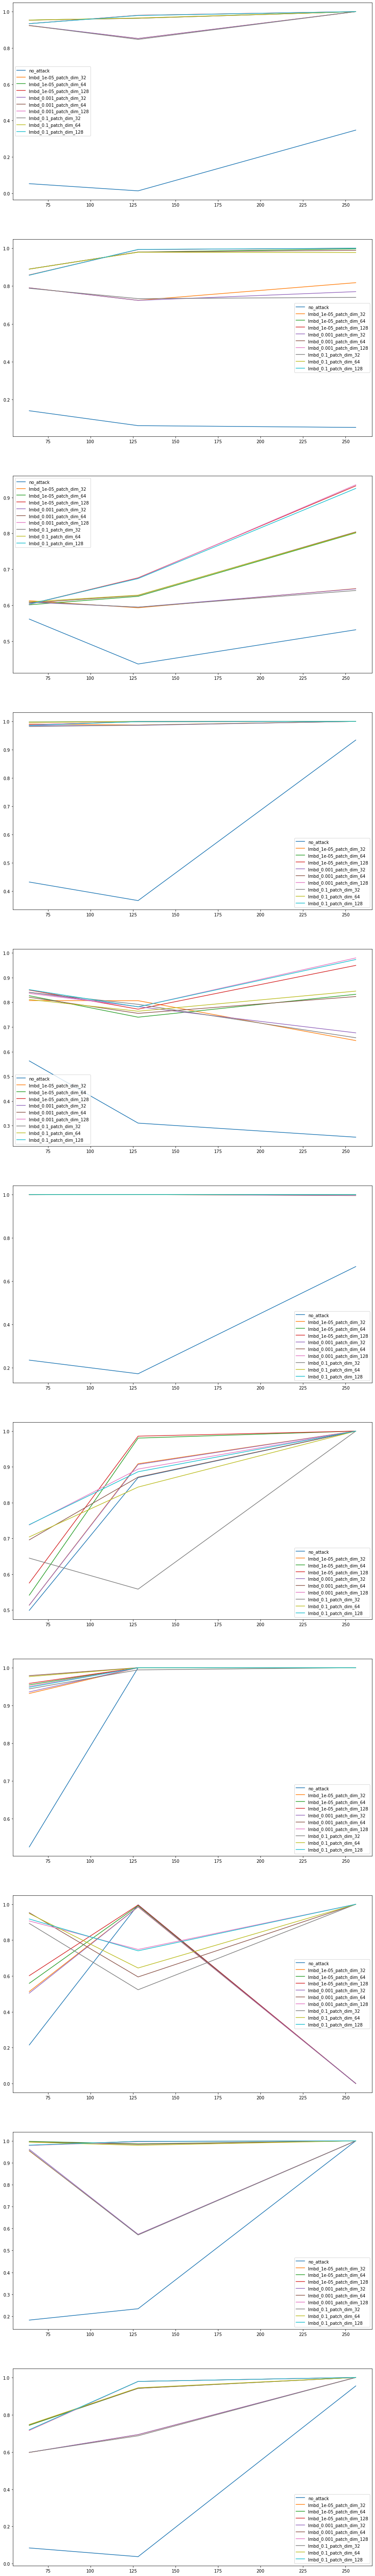

In [39]:
fig, ax = plt.subplots(len(shapes_arr), 1, squeeze=False)
fig.set_figheight(10*len(shapes_arr))
fig.set_figwidth(15)

for row, shape in enumerate(shapes_arr):
    # ax[row, 0].hist(class_label_to_sizes[row], bins=20)
    no_attack_plot_df = no_attack_results[(no_attack_results['class'] == shape)]
    no_attack_plot_df = no_attack_plot_df.sort_values(by='obj_size')
    ax[row, 0].plot(no_attack_plot_df['obj_size'], no_attack_plot_df['fnr'], label=f'no_attack')

    for lmbd in [1e-5, 1e-3, 1e-1]:
        for patch_dim in [32, 64, 128]:
            # for obj_size in [256, 128, 64]:
                plot_df = concat_results[(concat_results['class_index'] == row) & (concat_results['lmbd'] == lmbd) & (concat_results['patch_dim'] == patch_dim)]
                plot_df = plot_df.sort_values(by='obj_size')
                ax[row, 0].plot(plot_df['obj_size'], plot_df['fnr'], label=f'lmbd_{lmbd}_patch_dim_{patch_dim}')

                
    ax[row, 0].legend()
    
    # ax[row, 0].plot(scales, new_model_synthetic_fnr_no_attack[shape], label='attack', marker='o')
    # ax[row, 0].plot(scales, new_model_synthetic_fnr_attack[shape], label='no_attack', marker='o')
    # ax[row, 0].legend()
    # ax[row, 0].set_xlabel('dimension in num. pixels')
    # ax[row, 0].set_title(f'Shape: {shape}')
    # ax[row, 0].set_ylabel('fnr')
    # ax[row, 0].set_yticks(np.arange(0, 1.01, 0.1))
    # ax[row, 0].grid(b=True)
plt.show();
# plt.savefig('fnr_per_shape.png')

In [19]:
plot_df

,lmbd,patch_dim,obj_size,class,class_index,fnr
296,0.1,128,64,octagon-915.0,10,0.719433
294,0.1,128,64,rect-915.0-1220.0,8,0.917808
293,0.1,128,64,rect-762.0-915.0,7,0.948108
292,0.1,128,64,rect-458.0-610.0,6,0.738382
291,0.1,128,64,square-600.0,5,0.999732
290,0.1,128,64,diamond-915.0,4,0.851170
289,0.1,128,64,diamond-600.0,3,0.985753
288,0.1,128,64,triangle_inverted-1220.0,2,0.603114
287,0.1,128,64,triangle-900.0,1,0.857255
286,0.1,128,64,circle-750.0,0,0.933643


In [6]:
results_df[['name', 'num_images', 'max_f1_index', 'map_50_all', 'map_50_95_all', 'fnr_cmb', 'total_num_patches', 'fnr_synthetic', 'ap_50_synthetic', 'ap_50_95_synthetic']]


,name,num_images,max_f1_index,map_50_all,map_50_95_all,fnr_cmb,total_num_patches,fnr_synthetic,ap_50_synthetic,ap_50_95_synthetic
0,synthetic-10x20_bottom_mapillary_load_0,5000,403,0.738506,0.545293,0.586032,0,1.000000,0.773846,0.593067
1,synthetic-10x20_bottom_mapillary_none_0,5000,403,0.754953,0.563523,0.347974,0,0.347497,0.989779,0.827373
2,synthetic-10x20_bottom_mapillary_load_1,5000,403,0.752044,0.550602,0.516771,0,0.817741,0.908150,0.642701
3,synthetic-10x20_bottom_mapillary_none_1,5000,403,0.757584,0.564711,0.238783,0,0.052572,0.990010,0.823930
4,synthetic-10x20_bottom_mapillary_load_2,5000,403,0.748350,0.542574,0.453899,0,0.646281,0.973216,0.608551
5,synthetic-10x20_bottom_mapillary_none_2,5000,403,0.752076,0.559482,0.412153,0,0.531560,0.976966,0.783188
6,synthetic-10x20_bottom_mapillary_load_3,5000,403,0.685997,0.499241,0.582619,0,1.000000,0.180573,0.050337
7,synthetic-10x20_bottom_mapillary_none_3,5000,403,0.691570,0.497383,0.557500,0,0.934000,0.402656,0.130478
8,synthetic-10x20_bottom_mapillary_load_4,5000,403,0.754484,0.551197,0.453173,0,0.644868,0.953849,0.648752
9,synthetic-10x20_bottom_mapillary_none_4,5000,403,0.758886,0.573805,0.310513,0,0.253327,0.987188,0.916680


In [7]:
# synthetic
results_df = pd.read_csv(f'../runs/results.csv')
results_df[['name', 'max_f1_index', 'map_50_all', 'map_50_95_all', 'fnr_cmb', 'ap_50_octagon-915.0', 'fnr_octagon-915.0', 'fn_octagon-915.0', 'fp_octagon-915.0', 'total_num_patches']]

results_df[['name', 'num_images', 'max_f1_index', 'map_50_all', 'map_50_95_all', 'fnr_cmb', 'total_num_patches', 'fnr_synthetic', 'ap_50_synthetic', 'ap_50_95_synthetic']]


,name,num_images,max_f1_index,map_50_all,map_50_95_all,fnr_cmb,total_num_patches,fnr_synthetic,ap_50_synthetic,ap_50_95_synthetic
0,synthetic-10x20_bottom_mapillary_load_0,5000,403,0.738578,0.544839,0.585959,0,1.000000,0.774716,0.587595
1,synthetic-10x20_bottom_mapillary_load_1,5000,403,0.753135,0.553133,0.502033,0,0.777698,0.921418,0.672062
2,synthetic-10x20_bottom_mapillary_load_2,5000,403,0.748485,0.542723,0.455205,0,0.649650,0.972796,0.609286
3,synthetic-10x20_bottom_mapillary_load_3,5000,403,0.680026,0.496273,0.582474,0,1.000000,0.152836,0.040937
4,synthetic-10x20_bottom_mapillary_load_4,5000,403,0.754455,0.552378,0.462320,0,0.670099,0.955579,0.664266
